## Define CIFAR-10

```
name: "CifarNet"
node {
  name: "img_input"
  op: "Input"
  device: CPU
  type: T_FLOAT
  input_op_param {
    shape {
      dim: 20
      dim: 32
      dim: 32
      dim: 3
    }
  }
}
node {
  name: "CifarNet/conv1"
  input: "img_input"
  op: "Conv2D"
  device: CPU
  type: T_FLOAT
  conv2d_op_param {
    depth: 64
    kernel_size: 5
    pad: 2
    stride: 1
    activation_fn: "Relu"
  }
}
node {
  name: "CifarNet/pool1"
  input: "CifarNet/conv1"
  op: "MaxPool2D"
  device: CPU
  type: T_FLOAT
  max_pool2d_op_param {
    kernel_size: 2
    stride: 2
  }
}
node {
  name: "CifarNet/norm1"
  input: "CifarNet/pool1"
  op: "LRN"
  device: CPU
  type: T_FLOAT
  lrn_op_param {
    depth_radius: 4
    bias: 1.0
    alpha: 0.00011111111
    beta: 0.75
  }
}
node {
  name: "CifarNet/conv2"
  input: "CifarNet/norm1"
  op: "Conv2D"
  device: CPU
  type: T_FLOAT
  conv2d_op_param {
    depth: 64
    kernel_size: 5
    pad: 2
    stride: 1
    activation_fn: "Relu"
  }
}
node {
  name: "CifarNet/norm2"
  input: "CifarNet/conv2"
  op: "LRN"
  device: CPU
  type: T_FLOAT
  lrn_op_param {
    depth_radius: 4
    bias: 1.0
    alpha: 0.00011111111
    beta: 0.75
  }
}
node {
  name: "CifarNet/pool2"
  input: "CifarNet/norm2"
  op: "MaxPool2D"
  device: CPU
  type: T_FLOAT
  max_pool2d_op_param {
    kernel_size: 2
    stride: 2
  }
}
node {
  name: "CifarNet/flatten"
  input: "CifarNet/pool2"
  op: "Flatten"
  device: CPU
  type: T_FLOAT
}
node {
  name: "CifarNet/fc3"
  input: "CifarNet/flatten"
  op: "FullyConnected"
  device: CPU
  type: T_FLOAT
  fullyconnected_op_param {
    rows: 384
    activation_fn: "Relu"
  }
}
node {
  name: "CifarNet/fc4"
  input: "CifarNet/fc3"
  op: "FullyConnected"
  device: CPU
  type: T_FLOAT
  fullyconnected_op_param {
    rows: 192
    activation_fn: "Relu"
  }
}
node {
  name: "CifarNet/logits"
  input: "CifarNet/fc4"
  op: "FullyConnected"
  device: CPU
  type: T_FLOAT
  fullyconnected_op_param {
    rows: 10
    activation_fn: ""
  }
}

```

In [1]:
cifar10 = """
name: "CifarNet"
node {
  name: "img_input"
  op: "Input"
  device: CPU
  type: T_FLOAT
  input_op_param {
    shape {
      dim: 20
      dim: 32
      dim: 32
      dim: 3
    }
  }
}
node {
  name: "CifarNet/conv1"
  input: "img_input"
  op: "Conv2D"
  device: CPU
  type: T_FLOAT
  conv2d_op_param {
    depth: 64
    kernel_size: 5
    pad: 2
    stride: 1
    activation_fn: "Relu"
  }
}
node {
  name: "CifarNet/pool1"
  input: "CifarNet/conv1"
  op: "MaxPool2D"
  device: CPU
  type: T_FLOAT
  max_pool2d_op_param {
    kernel_size: 2
    stride: 2
  }
}
node {
  name: "CifarNet/norm1"
  input: "CifarNet/pool1"
  op: "LRN"
  device: CPU
  type: T_FLOAT
  lrn_op_param {
    depth_radius: 4
    bias: 1.0
    alpha: 0.00011111111
    beta: 0.75
  }
}
node {
  name: "CifarNet/conv2"
  input: "CifarNet/norm1"
  op: "Conv2D"
  device: CPU
  type: T_FLOAT
  conv2d_op_param {
    depth: 64
    kernel_size: 5
    pad: 2
    stride: 1
    activation_fn: "Relu"
  }
}
node {
  name: "CifarNet/norm2"
  input: "CifarNet/conv2"
  op: "LRN"
  device: CPU
  type: T_FLOAT
  lrn_op_param {
    depth_radius: 4
    bias: 1.0
    alpha: 0.00011111111
    beta: 0.75
  }
}
node {
  name: "CifarNet/pool2"
  input: "CifarNet/norm2"
  op: "MaxPool2D"
  device: CPU
  type: T_FLOAT
  max_pool2d_op_param {
    kernel_size: 2
    stride: 2
  }
}
node {
  name: "CifarNet/flatten"
  input: "CifarNet/pool2"
  op: "Flatten"
  device: CPU
  type: T_FLOAT
}
node {
  name: "CifarNet/fc3"
  input: "CifarNet/flatten"
  op: "FullyConnected"
  device: CPU
  type: T_FLOAT
  fullyconnected_op_param {
    rows: 384
    activation_fn: "Relu"
  }
}
node {
  name: "CifarNet/fc4"
  input: "CifarNet/fc3"
  op: "FullyConnected"
  device: CPU
  type: T_FLOAT
  fullyconnected_op_param {
    rows: 192
    activation_fn: "Relu"
  }
}
node {
  name: "CifarNet/logits"
  input: "CifarNet/fc4"
  op: "FullyConnected"
  device: CPU
  type: T_FLOAT
  fullyconnected_op_param {
    rows: 10
    activation_fn: ""
  }
}
"""
with open('./cifar10/cifar10.pbtxt', 'w') as f:
    f.write(cifar10)

## Visual CIFAR-10 DFG IR

Copy the above to the cifar10.pbtxt file.

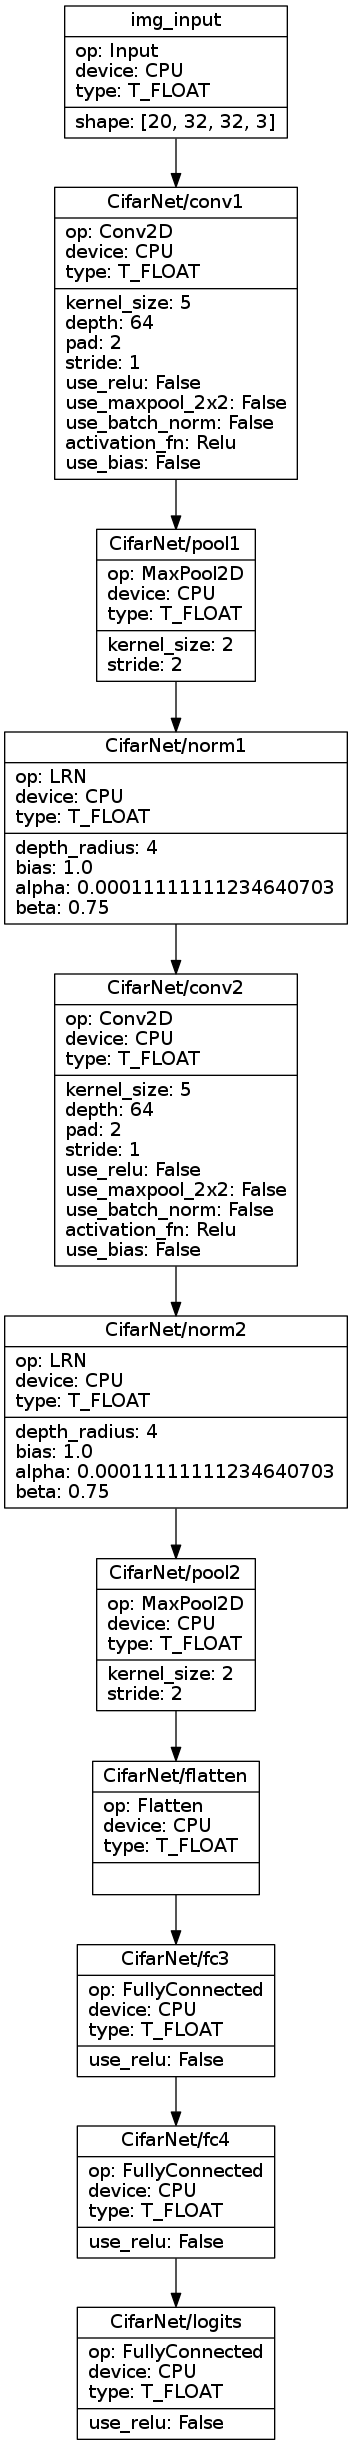

In [2]:
from PIL import Image
from plumber.utils import visualise_dfg

# Generate DFG IR png image
visualise_dfg('./cifar10/cifar10.pbtxt', './cifar10/cifar10.png')

im = Image.open('./cifar10/cifar10.png')
# show
im

## Train Model

We don't need to train the model with DFG IR, and Tensorflow is enough. But a complete and effective DFG IR is able to support model training.

In [3]:
import tensorflow as tf

## Prepare training data

The size of the data is 162MB, and the call time is longer, so we have prepared the data for you in advance. 

In [4]:
import sys
import os
import urllib
import tarfile

DATA_URL = 'https://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz'

def maybe_download_and_extract(dest_directory):
  """Download and extract the tarball from Alex's website."""
  if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)
  filename = DATA_URL.split('/')[-1]
  filepath = os.path.join(dest_directory, filename)
  if not os.path.exists(filepath):
    def _progress(count, block_size, total_size):
      sys.stdout.write('\r>> Downloading %s %.1f%%' % (filename,
          float(count * block_size) / float(total_size) * 100.0))
      sys.stdout.flush()
    filepath, _ = urllib.request.urlretrieve(DATA_URL, filepath, _progress)
    print()
    statinfo = os.stat(filepath)
    print('Successfully downloaded', filename, statinfo.st_size, 'bytes.')
  extracted_dir_path = os.path.join(dest_directory, 'cifar-10-batches-bin')
  if not os.path.exists(extracted_dir_path):
    tarfile.open(filepath, 'r:gz').extractall(dest_directory)

maybe_download_and_extract('./cifar10_train_data')

## Read input data

Cifar10's data read in is more complex than MNIST, so we use the code provided directly by tensorflow

In [5]:
# cifar10_input.py
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""Routine for decoding the CIFAR-10 binary file format."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

# Process images of this size. Note that this differs from the original CIFAR
# image size of 32 x 32. If one alters this number, then the entire model
# architecture will change and any model would need to be retrained.
IMAGE_SIZE = 24

# Global constants describing the CIFAR-10 data set.
NUM_CLASSES = 10
NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN = 50000
NUM_EXAMPLES_PER_EPOCH_FOR_EVAL = 10000


def read_cifar10(filename_queue):
  """Reads and parses examples from CIFAR10 data files.

  Recommendation: if you want N-way read parallelism, call this function
  N times.  This will give you N independent Readers reading different
  files & positions within those files, which will give better mixing of
  examples.

  Args:
    filename_queue: A queue of strings with the filenames to read from.

  Returns:
    An object representing a single example, with the following fields:
      height: number of rows in the result (32)
      width: number of columns in the result (32)
      depth: number of color channels in the result (3)
      key: a scalar string Tensor describing the filename & record number
        for this example.
      label: an int32 Tensor with the label in the range 0..9.
      uint8image: a [height, width, depth] uint8 Tensor with the image data
  """

  class CIFAR10Record(object):
    pass
  result = CIFAR10Record()

  # Dimensions of the images in the CIFAR-10 dataset.
  # See http://www.cs.toronto.edu/~kriz/cifar.html for a description of the
  # input format.
  label_bytes = 1  # 2 for CIFAR-100
  result.height = 32
  result.width = 32
  result.depth = 3
  image_bytes = result.height * result.width * result.depth
  # Every record consists of a label followed by the image, with a
  # fixed number of bytes for each.
  record_bytes = label_bytes + image_bytes

  # Read a record, getting filenames from the filename_queue.  No
  # header or footer in the CIFAR-10 format, so we leave header_bytes
  # and footer_bytes at their default of 0.
  reader = tf.FixedLengthRecordReader(record_bytes=record_bytes)
  result.key, value = reader.read(filename_queue)

  # Convert from a string to a vector of uint8 that is record_bytes long.
  record_bytes = tf.decode_raw(value, tf.uint8)

  # The first bytes represent the label, which we convert from uint8->int32.
  result.label = tf.cast(
      tf.strided_slice(record_bytes, [0], [label_bytes]), tf.int32)

  # The remaining bytes after the label represent the image, which we reshape
  # from [depth * height * width] to [depth, height, width].
  depth_major = tf.reshape(
      tf.strided_slice(record_bytes, [label_bytes],
                       [label_bytes + image_bytes]),
      [result.depth, result.height, result.width])
  # Convert from [depth, height, width] to [height, width, depth].
  result.uint8image = tf.transpose(depth_major, [1, 2, 0])

  return result


def _generate_image_and_label_batch(image, label, min_queue_examples,
                                    batch_size, shuffle):
  """Construct a queued batch of images and labels.

  Args:
    image: 3-D Tensor of [height, width, 3] of type.float32.
    label: 1-D Tensor of type.int32
    min_queue_examples: int32, minimum number of samples to retain
      in the queue that provides of batches of examples.
    batch_size: Number of images per batch.
    shuffle: boolean indicating whether to use a shuffling queue.

  Returns:
    images: Images. 4D tensor of [batch_size, height, width, 3] size.
    labels: Labels. 1D tensor of [batch_size] size.
  """
  # Create a queue that shuffles the examples, and then
  # read 'batch_size' images + labels from the example queue.
  num_preprocess_threads = 16
  if shuffle:
    images, label_batch = tf.train.shuffle_batch(
        [image, label],
        batch_size=batch_size,
        num_threads=num_preprocess_threads,
        capacity=min_queue_examples + 3 * batch_size,
        min_after_dequeue=min_queue_examples)
  else:
    images, label_batch = tf.train.batch(
        [image, label],
        batch_size=batch_size,
        num_threads=num_preprocess_threads,
        capacity=min_queue_examples + 3 * batch_size)

  # Display the training images in the visualizer.
  tf.summary.image('images', images)

  return images, tf.reshape(label_batch, [batch_size])


def distorted_inputs(data_dir, batch_size):
  """Construct distorted input for CIFAR training using the Reader ops.

  Args:
    data_dir: Path to the CIFAR-10 data directory.
    batch_size: Number of images per batch.

  Returns:
    images: Images. 4D tensor of [batch_size, IMAGE_SIZE, IMAGE_SIZE, 3] size.
    labels: Labels. 1D tensor of [batch_size] size.
  """
  filenames = [os.path.join(data_dir, 'data_batch_%d.bin' % i)
               for i in xrange(1, 6)]
  for f in filenames:
    if not tf.gfile.Exists(f):
      raise ValueError('Failed to find file: ' + f)

  # Create a queue that produces the filenames to read.
  filename_queue = tf.train.string_input_producer(filenames)

  with tf.name_scope('data_augmentation'):
    # Read examples from files in the filename queue.
    read_input = read_cifar10(filename_queue)
    reshaped_image = tf.cast(read_input.uint8image, tf.float32)

    height = IMAGE_SIZE
    width = IMAGE_SIZE

    # Image processing for training the network. Note the many random
    # distortions applied to the image.

    # Randomly crop a [height, width] section of the image.
    distorted_image = tf.random_crop(reshaped_image, [height, width, 3])

    # Randomly flip the image horizontally.
    distorted_image = tf.image.random_flip_left_right(distorted_image)

    # Because these operations are not commutative, consider randomizing
    # the order their operation.
    # NOTE: since per_image_standardization zeros the mean and makes
    # the stddev unit, this likely has no effect see tensorflow#1458.
    distorted_image = tf.image.random_brightness(distorted_image,
                                                 max_delta=63)
    distorted_image = tf.image.random_contrast(distorted_image,
                                               lower=0.2, upper=1.8)

    # Subtract off the mean and divide by the variance of the pixels.
    float_image = tf.image.per_image_standardization(distorted_image)

    # Set the shapes of tensors.
    float_image.set_shape([height, width, 3])
    read_input.label.set_shape([1])

    # Ensure that the random shuffling has good mixing properties.
    min_fraction_of_examples_in_queue = 0.4
    min_queue_examples = int(NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN *
                             min_fraction_of_examples_in_queue)
    print ('Filling queue with %d CIFAR images before starting to train. '
           'This will take a few minutes.' % min_queue_examples)

  # Generate a batch of images and labels by building up a queue of examples.
  return _generate_image_and_label_batch(float_image, read_input.label,
                                         min_queue_examples, batch_size,
                                         shuffle=True)


In [6]:
batch_size = 128
# Get images and labels for CIFAR-10.
# Force input pipeline to CPU:0 to avoid operations sometimes ending up on
# GPU and resulting in a slow down.
with tf.device('/cpu:0'):
    data_dir = os.path.join('./cifar10_train_data', 'cifar-10-batches-bin')
    images, labels = distorted_inputs(data_dir, batch_size)
    print(images)
    print(labels)


Filling queue with 20000 CIFAR images before starting to train. This will take a few minutes.
Tensor("shuffle_batch:0", shape=(128, 24, 24, 3), dtype=float32, device=/device:CPU:0)
Tensor("Reshape:0", shape=(128,), dtype=int32, device=/device:CPU:0)


## Get Inference by DFG IR

Use our DFG IR file instead of Inference written in code

In [7]:
from plumber.utils import dfg_to_tf

# We use pbtxt to load the model and get a graph that defines the network model
batch_size = 128

graph = tf.Graph()
with graph.as_default():
    
    # Get images and labels for CIFAR-10.
    # Force input pipeline to CPU:0 to avoid operations sometimes ending up on
    # GPU and resulting in a slow down.
    with tf.device('/cpu:0'):
        data_dir = os.path.join('./cifar10_train_data', 'cifar-10-batches-bin')
        images, labels = distorted_inputs(data_dir, batch_size)
    graph, output_nodes = dfg_to_tf('./cifar10.pbtxt', graph, inputs=images)

logits = output_nodes['cls_output_node']
print(logits)

Filling queue with 20000 CIFAR images before starting to train. This will take a few minutes.
Tensor("CifarNet/logits/BiasAdd:0", shape=(128, 10), dtype=float32)


## Define Loss function

Use the code provided by tensorflowt directly.

In [8]:
def cifar10_loss(logits, labels):
  """Add L2Loss to all the trainable variables.
  Add summary for "Loss" and "Loss/avg".
  Args:
    logits: Logits from inference().
    labels: Labels from distorted_inputs or inputs(). 1-D tensor
            of shape [batch_size]
  Returns:
    Loss tensor of type float.
  """
  # Calculate the average cross entropy loss across the batch.
  labels = tf.cast(labels, tf.int64)
  cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
      labels=labels, logits=logits, name='cross_entropy_per_example')
  cross_entropy_mean = tf.reduce_mean(cross_entropy, name='cross_entropy')
  tf.add_to_collection('losses', cross_entropy_mean)

  # The total loss is defined as the cross entropy loss plus all of the weight
  # decay terms (L2 loss).
  return tf.add_n(tf.get_collection('losses'), name='total_loss')

## Define train function

Use the code provided by tensorflowt directly.

In [9]:
# Global constants describing the CIFAR-10 data set.
BATCH_SIZE = 128
IMAGE_SIZE = 24
NUM_CLASSES = 10
NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN = 50000
NUM_EXAMPLES_PER_EPOCH_FOR_EVAL = 10000


# Constants describing the training process.
MOVING_AVERAGE_DECAY = 0.9999     # The decay to use for the moving average.
NUM_EPOCHS_PER_DECAY = 350.0      # Epochs after which learning rate decays.
LEARNING_RATE_DECAY_FACTOR = 0.1  # Learning rate decay factor.
INITIAL_LEARNING_RATE = 0.1       # Initial learning rate.

def _add_loss_summaries(total_loss):
  """Add summaries for losses in CIFAR-10 model.
  Generates moving average for all losses and associated summaries for
  visualizing the performance of the network.
  Args:
    total_loss: Total loss from loss().
  Returns:
    loss_averages_op: op for generating moving averages of losses.
  """
  # Compute the moving average of all individual losses and the total loss.
  loss_averages = tf.train.ExponentialMovingAverage(0.9, name='avg')
  losses = tf.get_collection('losses')
  loss_averages_op = loss_averages.apply(losses + [total_loss])

  # Attach a scalar summary to all individual losses and the total loss; do the
  # same for the averaged version of the losses.
  for l in losses + [total_loss]:
    # Name each loss as '(raw)' and name the moving average version of the loss
    # as the original loss name.
    tf.summary.scalar(l.op.name + ' (raw)', l)
    tf.summary.scalar(l.op.name, loss_averages.average(l))

  return loss_averages_op

def cifar10_train(total_loss, global_step):
  """Train CIFAR-10 model.
  Create an optimizer and apply to all trainable variables. Add moving
  average for all trainable variables.
  Args:
    total_loss: Total loss from loss().
    global_step: Integer Variable counting the number of training steps
      processed.
  Returns:
    train_op: op for training.
  """
  # Variables that affect learning rate.
  num_batches_per_epoch = NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN / BATCH_SIZE
  decay_steps = int(num_batches_per_epoch * NUM_EPOCHS_PER_DECAY)

  # Decay the learning rate exponentially based on the number of steps.
  lr = tf.train.exponential_decay(INITIAL_LEARNING_RATE,
                                  global_step,
                                  decay_steps,
                                  LEARNING_RATE_DECAY_FACTOR,
                                  staircase=True)
  tf.summary.scalar('learning_rate', lr)

  # Generate moving averages of all losses and associated summaries.
  loss_averages_op = _add_loss_summaries(total_loss)

  # Compute gradients.
  with tf.control_dependencies([loss_averages_op]):
    opt = tf.train.GradientDescentOptimizer(lr)
    grads = opt.compute_gradients(total_loss)

  # Apply gradients.
  apply_gradient_op = opt.apply_gradients(grads, global_step=global_step)

  # Add histograms for trainable variables.
  for var in tf.trainable_variables():
    tf.summary.histogram(var.op.name, var)

  # Add histograms for gradients.
  for grad, var in grads:
    if grad is not None:
      tf.summary.histogram(var.op.name + '/gradients', grad)

  # Track the moving averages of all trainable variables.
  variable_averages = tf.train.ExponentialMovingAverage(
      MOVING_AVERAGE_DECAY, global_step)
  with tf.control_dependencies([apply_gradient_op]):
    variables_averages_op = variable_averages.apply(tf.trainable_variables())

  return variables_averages_op

## Start Train

Combine the above steps to start training.

NOTE：Server resources are limited, do not perform frequently.

In [10]:
import time
from datetime import datetime
from plumber.utils import dfg_to_tf

BATCH_SIZE = 128
MAX_STEPS = 100
CKPT_DIR = './cifar10_logs'
LOG_FREQUENCY = 10

def train():
  """Train CIFAR-10 for a number of steps."""
  graph = tf.Graph()
  with graph.as_default():
    global_step = tf.train.get_or_create_global_step()
   
    # Build a Graph that computes the logits predictions from the
    # inference model.
    #logits = cifar10.inference(images)
    
    with tf.device('/cpu:0'):
        data_dir = os.path.join('./cifar10_train_data', 'cifar-10-batches-bin')
        images, labels = distorted_inputs(data_dir, batch_size)
    graph, output_nodes = dfg_to_tf('./cifar10.pbtxt', graph, inputs=images)
    logits = output_nodes['cls_output_node']

    # Calculate loss.
    loss = cifar10_loss(logits, labels)

    # Build a Graph that trains the model with one batch of examples and
    # updates the model parameters.
    train_op = cifar10_train(loss, global_step)

    class _LoggerHook(tf.train.SessionRunHook):
      """Logs loss and runtime."""

      def begin(self):
        self._step = -1
        self._start_time = time.time()

      def before_run(self, run_context):
        self._step += 1
        return tf.train.SessionRunArgs(loss)  # Asks for loss value.

      def after_run(self, run_context, run_values):
        if self._step % LOG_FREQUENCY == 0:
          current_time = time.time()
          duration = current_time - self._start_time
          self._start_time = current_time

          loss_value = run_values.results
          examples_per_sec = LOG_FREQUENCY * BATCH_SIZE / duration
          sec_per_batch = float(duration / LOG_FREQUENCY)

          format_str = ('%s: step %d, loss = %.2f (%.1f examples/sec; %.3f '
                        'sec/batch)')
          print (format_str % (datetime.now(), self._step, loss_value,
                               examples_per_sec, sec_per_batch))

    with tf.train.MonitoredTrainingSession(
        checkpoint_dir=CKPT_DIR,
        hooks=[tf.train.StopAtStepHook(last_step=MAX_STEPS),
               tf.train.NanTensorHook(loss),
               _LoggerHook()],
        config=tf.ConfigProto(
            log_device_placement=False)) as mon_sess:
      while not mon_sess.should_stop():
        mon_sess.run(train_op)

train()

Filling queue with 20000 CIFAR images before starting to train. This will take a few minutes.
INFO:tensorflow:Summary name cross_entropy (raw) is illegal; using cross_entropy__raw_ instead.
INFO:tensorflow:Summary name total_loss (raw) is illegal; using total_loss__raw_ instead.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./cifar10_logs/model.ckpt-2
INFO:tensorflow:Saving checkpoints for 3 into ./cifar10_logs/model.ckpt.
2018-07-18 15:36:46.067514: step 0, loss = 2.29 (65.6 examples/sec; 1.951 sec/batch)
2018-07-18 15:37:11.150518: step 10, loss = 2.17 (51.0 examples/sec; 2.508 sec/batch)
2018-07-18 15:37:40.528544: step 20, loss = 2.03 (43.6 examples/sec; 2.938 sec/batch)
2018-07-18 15:38:04.445986: step 30, loss = 1.98 (53.5 examples/sec; 2.392 sec/batch)
2018-07-18 15:38:24.177207: step 40, loss = 2.26 (64.9 examples/sec; 1.973 sec/batch)
2018-07-18 15:38:44.791926: step 50, loss = 2.00 (62.1 examples/sec; 2.061 sec/batch)
2018-07-18 15:38:5